In [446]:
import sys
sys.path.insert(0,'C:\\Coding\\Local_repositories\\Exammmmm\\')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import optimize

import seaborn as sns
sns.set_theme()

# pd.set_option('display.float_format', '{:.4f}'.format) # 4 decimals are shown in pandas dataframes

from OwnCodeLib import four_deci
from codelib.visualization.base import fan_chart

# Optimizing portfolios

In [447]:
# Load data

asset = {}

for i in range(1, 11):
    asset[i] = pd.read_csv("C:\\Coding\\Local_repositories\\Exammmmm\\ExamData\\asset_{}.csv".format(i), index_col = 0).transpose()

In [448]:
# Linear and cumulative returns and log returns

lin_ret = {}
cum_lin_ret = {}
log_ret = {}
cum_log_ret = {}

for i in asset:
    lin_ret[i] = asset[i][:] / asset[i][:].shift(1) - 1
    cum_lin_ret[i] = (lin_ret[i] + 1).cumprod() - 1
    log_ret[i] = np.log(asset[i][:] / asset[i][:].shift(1))
    cum_log_ret[i] = log_ret[i].cumsum()

In [449]:
# Descriptive stats 1 year horizon

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "95th percentile"]
oneypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
oneyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    oneypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    oneypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    oneypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    oneypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    oneypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    oneypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    oneyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    oneyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    oneyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    oneyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    oneyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    oneyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(oneypricedescr.to_latex())
print(oneyretdescr.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile & 95th percentile \\
\midrule
1  &  1.092798 &           0.189981 &  0.160498 &  0.285135 &       0.784331 &        1.412145 \\
2  &  1.095515 &           0.192603 &  0.185659 &  0.265471 &       0.787527 &        1.421149 \\
3  &  1.091915 &           0.191742 &  0.197202 &   0.23909 &       0.782972 &        1.409817 \\
4  &  1.085131 &            0.18128 &  0.158357 &  0.394116 &        0.78924 &        1.389107 \\
5  &  1.070206 &           0.153326 &  0.040871 &  0.344938 &       0.814935 &        1.321808 \\
6  &  1.063204 &           0.140139 & -0.075311 &  0.338187 &       0.827722 &         1.29009 \\
7  &  1.061836 &           0.140387 & -0.066703 &  0.308762 &       0.823161 &         1.28449 \\
8  &  1.056576 &           0.127525 & -0.133624 &  0.365465 &       0.839421 &        1.259829 \\
9  &  1.056067 &           0.128044 & -0.129932 &  0.383646 &       0.83905

In [450]:
# Descriptive stats 5 year horizon

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "5th percentile", "95th percentile"]
fiveypricedescr = pd.DataFrame(columns = columns, index = range(1, 11))
fiveyretdescr = pd.DataFrame(columns = columns, index = range(1, 11))

for i, j in zip(asset, range(1, 11)):
    fiveypricedescr["Mean"].loc[j] = (asset[i].iloc[horizon, :].mean())
    fiveypricedescr["Standard deviation"].loc[j] = (asset[i].iloc[horizon, :].std())
    fiveypricedescr["Skewness"].loc[j] = (asset[i].iloc[horizon, :].skew())
    fiveypricedescr["Kurtosis"].loc[j] = (asset[i].iloc[horizon, :].kurtosis())
    fiveypricedescr["5th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.05))
    fiveypricedescr["95th percentile"].loc[j] = (asset[i].iloc[horizon, :].quantile(0.95))
    fiveyretdescr["Mean"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].mean())
    fiveyretdescr["Standard deviation"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].std())
    fiveyretdescr["Skewness"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].skew())
    fiveyretdescr["Kurtosis"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].kurtosis())
    fiveyretdescr["5th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.05))
    fiveyretdescr["95th percentile"].loc[j] = (cum_lin_ret[i].iloc[horizon, :].quantile(0.95))   
print(fiveypricedescr.to_latex())
print(fiveyretdescr.to_latex())

\begin{tabular}{lllllll}
\toprule
{} &      Mean & Standard deviation &  Skewness &  Kurtosis & 5th percentile & 95th percentile \\
\midrule
1  &  1.544342 &           0.630468 &  1.052919 &  1.880734 &       0.711896 &        2.709996 \\
2  &  1.544306 &           0.629056 &  1.106931 &   2.42783 &       0.711857 &        2.709659 \\
3  &  1.535913 &           0.618368 &  1.094611 &   2.25201 &       0.726861 &        2.696267 \\
4  &  1.489003 &           0.569249 &  0.991692 &  1.810616 &       0.717818 &        2.549393 \\
5  &  1.390207 &           0.455167 &  0.809633 &   1.42071 &       0.750819 &        2.217411 \\
6  &  1.348795 &           0.410607 &  0.742998 &  1.121342 &       0.759814 &         2.07698 \\
7  &  1.342453 &           0.406595 &  0.743284 &  1.245541 &       0.761049 &        2.069306 \\
8  &  1.307352 &           0.364608 &   0.55645 &  0.515262 &       0.771279 &        1.967565 \\
9  &  1.303866 &           0.360752 &  0.589246 &  0.719585 &       0.76978

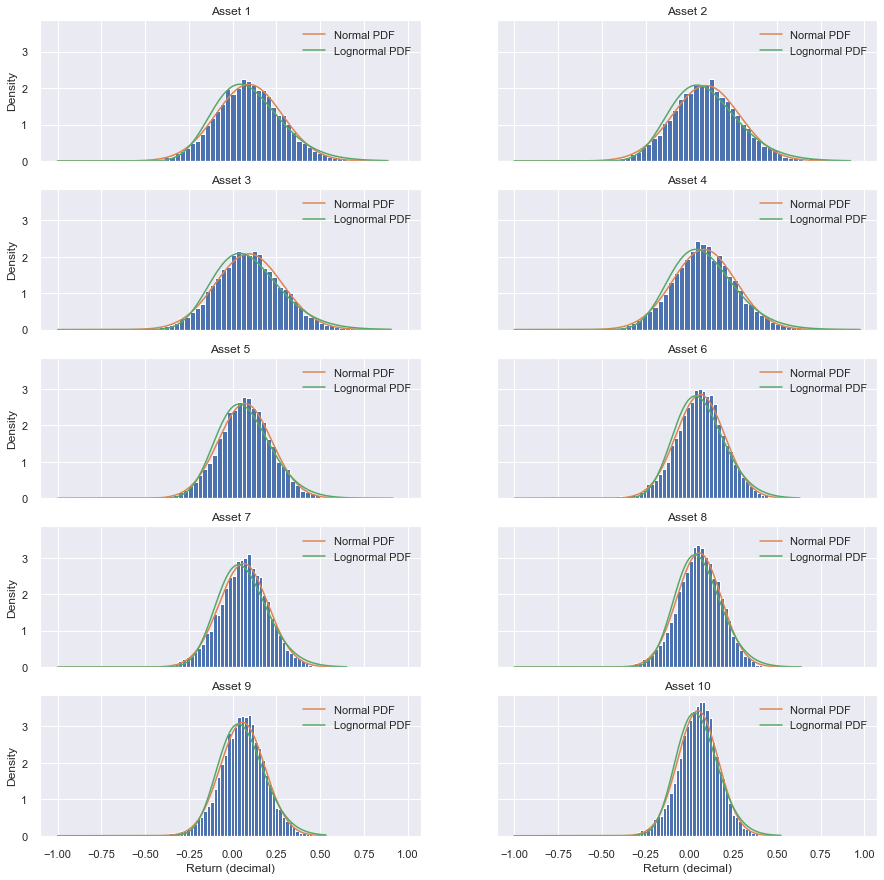

In [451]:
# 1 year return distributions

horizon = 1
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.show()

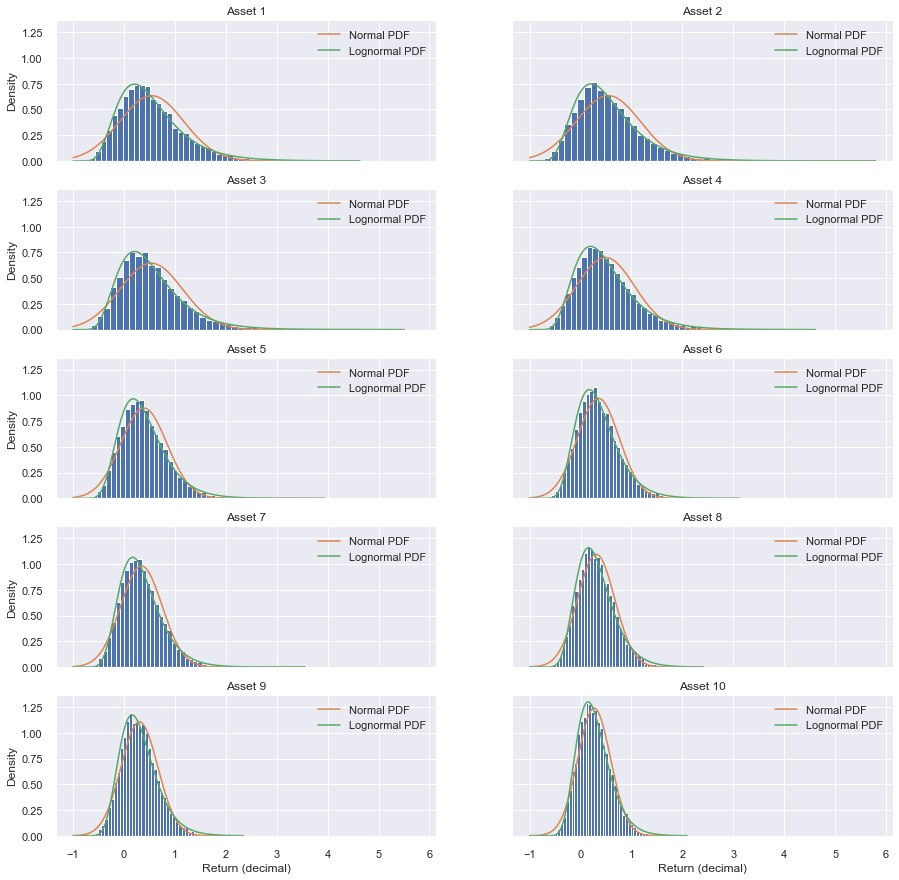

In [452]:
# 5 year return distributions

horizon = 5
lims = [-0.75, 0.75]
bins = 50

fig, ax = plt.subplots(5, 2, figsize = (15, 15), sharex = True, sharey = True)
order_one = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
order_two = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

for j, k, i in zip(order_one, order_two, range(1, 11)):
    x = np.linspace(start = -1, stop = cum_lin_ret[i].iloc[horizon, :].max(), num = 1000)
    ax[j][k].hist(cum_lin_ret[i].iloc[horizon, :], bins = bins, density = True)
    ax[j][k].plot(x, stats.norm.pdf(x, loc = cum_lin_ret[i].iloc[horizon, :].mean(), scale = cum_lin_ret[i].iloc[horizon, :].std()), label = "Normal PDF")
    ax[j][k].plot(x, stats.lognorm.pdf(x + 1, scale = np.exp(cum_log_ret[i].iloc[horizon, :].mean()), s = cum_log_ret[i].iloc[horizon, :].std()), label = "Lognormal PDF")
    
    ax[j][k].set_title("Asset {}".format(i))
    ax[j][k].legend()

ax[4][0].set_xlabel("Return (decimal)") 
ax[4][1].set_xlabel("Return (decimal)")     
    
ax[0][0].set_ylabel("Density")
ax[1][0].set_ylabel("Density") 
ax[2][0].set_ylabel("Density") 
ax[3][0].set_ylabel("Density") 
ax[4][0].set_ylabel("Density") 

plt.show()

In [453]:
# Equally weighted

pf_ew_ret = (lin_ret[1] + lin_ret[2] + lin_ret[3] + lin_ret[4] + lin_ret[5] + lin_ret[6] + lin_ret[7] + lin_ret[8] + lin_ret[9] + lin_ret[10]) / len(lin_ret)
pf_ew_price = ((pf_ew_ret + 1).cumprod() - 1).fillna(0) + 1
pf_ew_price_np = pf_ew_price.to_numpy()

# Buy and hold

pf_bh_price = (asset[1] + asset[2] + asset[3] + asset[4] + asset[5] + asset[6] + asset[7] + asset[8] + asset[9] + asset[10]) / len(asset)
pf_bh_price_np = pf_bh_price.to_numpy()

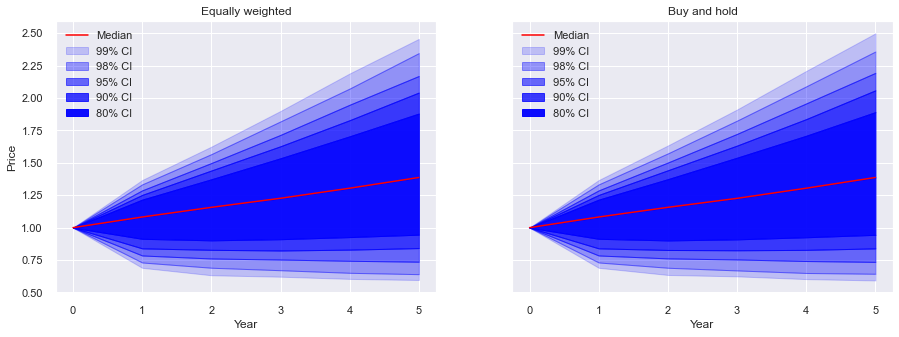

In [454]:
# Plot of prices

x = np.linspace(0, 5, 6)

percentiles_pf_ew_price_np = np.percentile(pf_ew_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharex = True, sharey = True)

fan_chart(x,
          percentiles_pf_ew_price_np,
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax = ax[0])

ax[0].set_xlabel("Year")
ax[0].set_ylabel("Price")
ax[0].set_title("Equally weighted")

ax[0].legend(loc='upper left');

percentiles_pf_bh_price_np = np.percentile(pf_bh_price_np, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5], axis=1)

fan_chart(x,
          percentiles_pf_bh_price_np,
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax = ax[1])

ax[1].set_xlabel("Year")

ax[1].set_title("Buy and hold")

ax[1].legend(loc='upper left');

In [455]:
# Equally weighted returns and cumulative returns

pf_ew_ret = pf_ew_price / pf_ew_price.shift(1) - 1
pf_ew_cum_ret = (1 + pf_ew_ret).cumprod() - 1

# Buy and hold returns and cumulative returns

pf_bh_ret = pf_bh_price / pf_bh_price.shift(1) - 1
pf_bh_cum_ret = (1 + pf_bh_ret).cumprod() - 1

In [456]:
# 1 year portfolio returns descriptive statistics for both EW and BH

horizon = 1
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
oneypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

oneypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

oneypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
oneypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
oneypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
oneypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
oneypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
oneypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [457]:
oneypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.072314,0.122671,-0.530503,0.808981,-0.159746,-0.229001
BH,0.072314,0.122671,-0.530503,0.808981,-0.159746,-0.229001


In [458]:
# 5 year portfolio returns descriptive statistics for both EW and BH

horizon = 5
columns = ["Mean", "Standard deviation", "Skewness", "Kurtosis", "95% VaR", "95% CVaR"]
index = ["EW", "BH"]
fiveypfdescr = pd.DataFrame(columns = columns, index = index)

# Equally weighted

fiveypfdescr["Mean"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["EW"] = pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["EW"] = np.mean(pf_ew_cum_ret.iloc[horizon, :][pf_ew_cum_ret.iloc[horizon, :] <= pf_ew_cum_ret.iloc[horizon, :].quantile(0.05)])

# Buy and hold

fiveypfdescr["Mean"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].mean()
fiveypfdescr["Standard deviation"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].std()
fiveypfdescr["Skewness"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].skew()
fiveypfdescr["Kurtosis"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].kurtosis()
fiveypfdescr["95% VaR"].loc["BH"] = pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)
fiveypfdescr["95% CVaR"].loc["BH"] = np.mean(pf_bh_cum_ret.iloc[horizon, :][pf_bh_cum_ret.iloc[horizon, :] <= pf_bh_cum_ret.iloc[horizon, :].quantile(0.05)])

In [459]:
fiveypfdescr

,Mean,Standard deviation,Skewness,Kurtosis,95% VaR,95% CVaR
EW,0.404248,0.367125,0.382258,0.409362,-0.157566,-0.27926
BH,0.407453,0.372615,0.41841,0.46775,-0.159927,-0.279982


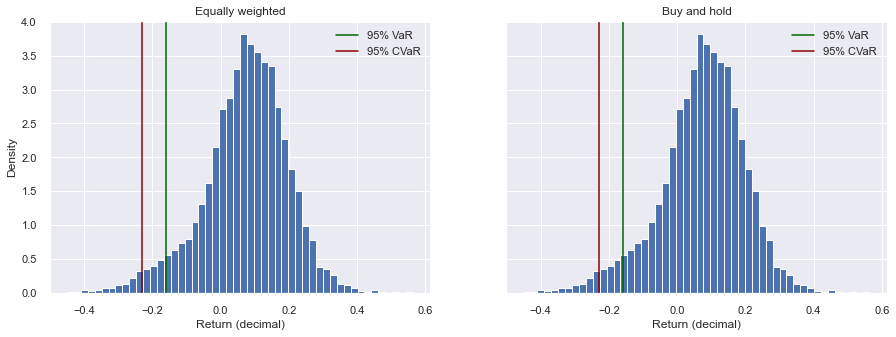

In [460]:
# 1 year portfolio returns distributions for both EW and BH

horizon = 1
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(oneypfdescr["95% VaR"].loc["EW"], label = "95% VaR", color = "darkgreen")
ax[0].axvline(oneypfdescr["95% CVaR"].loc["EW"], label = "95% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(oneypfdescr["95% VaR"].loc["BH"], label = "95% VaR", color = "darkgreen")
ax[1].axvline(oneypfdescr["95% CVaR"].loc["BH"], label = "95% CVaR", color = "darkred")
ax[1].set_title("Buy and hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

plt.show()

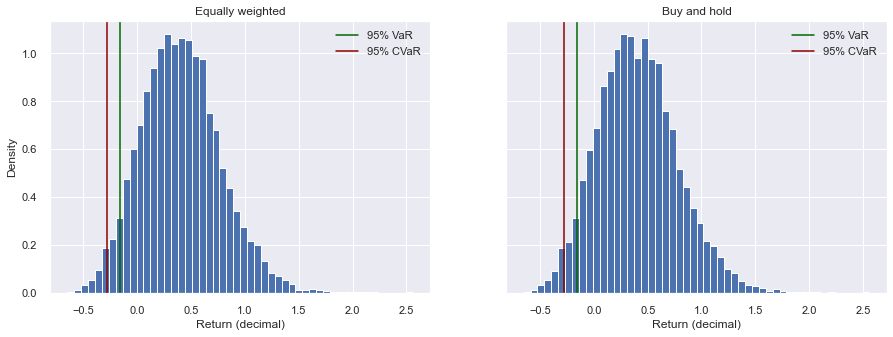

In [461]:
# 5 year portfolio returns distributions for both EW and BH

horizon = 5
bins = 50

fig, ax = plt.subplots(1, 2, figsize = (15, 5), sharex = True, sharey = True)

ax[0].hist(pf_ew_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[0].axvline(fiveypfdescr["95% VaR"].loc["EW"], label = "95% VaR", color = "darkgreen")
ax[0].axvline(fiveypfdescr["95% CVaR"].loc["EW"], label = "95% CVaR", color = "darkred")
ax[0].set_title("Equally weighted")
ax[0].legend()

ax[1].hist(pf_bh_cum_ret.iloc[horizon, :], bins = bins, density = True)
ax[1].axvline(fiveypfdescr["95% VaR"].loc["BH"], label = "95% VaR", color = "darkgreen")
ax[1].axvline(fiveypfdescr["95% CVaR"].loc["BH"], label = "95% CVaR", color = "darkred")
ax[1].set_title("Buy and hold")
ax[1].legend()

ax[0].set_xlabel("Return (decimal)") 
ax[1].set_xlabel("Return (decimal)")        
ax[0].set_ylabel("Density")

plt.show()

In [462]:
# We convert the dictionary into a 3D numpy array

cum_lin_ret_np = np.array(list(cum_lin_ret.values())).T

## Optimal portfolio weights (buy and hold) 

In [463]:
# Minimization of standard deviation

# Objective function

def OptPFWeightsMinStd(w: np.array, horizon: int, cum_lin_ret_np: np.array):
    """Finds standard deviation of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return pf_return[horizon, :].std(ddof=1)

# Minimization of CVaR

# Objective function

def OptPFWeightsMinCVaR(w: np.array, horizon: int, cum_lin_ret_np: np.array, alpha: int = 95):
    """Finds CVaR of the returns of a buy and hold portfolio for a given horizon"""
    pf_return = (cum_lin_ret_np @ w).T
    return abs(np.mean(pf_return[horizon, :][pf_return[horizon, :] <= np.percentile(pf_return[horizon, :], (100 - alpha))]))

### 1 year horizon

In [464]:
# Constraints

target = 0.08

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [465]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwstdoney.x.round(4)

array([0.1145, 0.186 , 0.1068, 0.1779, 0.1637, 0.0633, 0.1067, 0.0183,
       0.0628, 0.    ])

In [466]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 8%
# 1 year horizon 

horizon = 1

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwcvaroney.x.round(4)

array([0.    , 0.2435, 0.1194, 0.2472, 0.1866, 0.    , 0.0376, 0.0169,
       0.1489, 0.    ])

### 5 year horizon

In [467]:
# Constraints

target = 0.45

def cons_1(w):
    return np.sum(w) - 1

def cons_2(w, horizon, cum_lin_ret_np):
    return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target

In [468]:
# Minimizing objective function (standard deviation) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwstdfivey.x.round(4)

array([0.0832, 0.14  , 0.1405, 0.1922, 0.1922, 0.0599, 0.1293, 0.    ,
       0.0627, 0.    ])

In [469]:
# Minimizing objective function (CVaR) w.r.t. weights with target return 45%
# 5 year horizon 

horizon = 5

bounds = [(0, 1)] * len(asset) # No shorting constraint
args = (horizon, cum_lin_ret_np) # Exogenous input
x0 = [1/10] * len(asset) # Initial values
constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
optwcvarfivey.x.round(4)

array([0.    , 0.1267, 0.2317, 0.223 , 0.1904, 0.0124, 0.1125, 0.    ,
       0.0828, 0.0205])

# Plotting the optimal portfolio weights

### 1 year horizon

In [470]:
# One year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.05, 0.09, 21)
opt_weight_std_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdoney = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdoney.x.round(4)
    
    opt_weight_std_one_year.append(optwstdoney.x)

In [471]:
# One year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.05, 0.09, 21)
opt_weight_CVaR_one_year = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 1 year horizon 

    horizon = 1

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvaroney = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvaroney.x.round(4)
    
    opt_weight_CVaR_one_year.append(optwcvaroney.x)

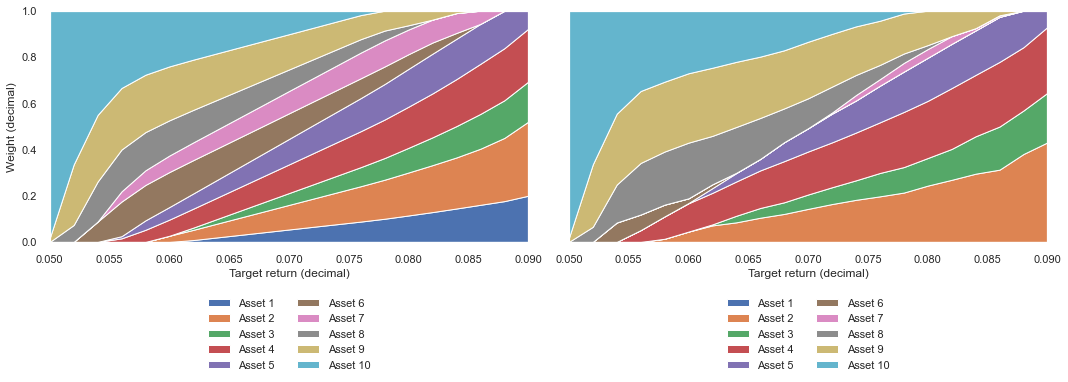

In [472]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_one_year).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

ax[1].stackplot(targets, np.array(opt_weight_CVaR_one_year).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()

### 5 year horizon

In [473]:
# Five year optimal portfolio weights for different targets return, minimizing standard deviation

targets = np.linspace(0.3, 0.5, 41)
opt_weight_std_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (standard deviation) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwstdfivey = optimize.minimize(fun = OptPFWeightsMinStd, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwstdfivey.x.round(4)
    
    opt_weight_std_five_years.append(optwstdfivey.x)

In [474]:
# Five year optimal portfolio weights for different targets return, minimizing CVaR

targets = np.linspace(0.3, 0.5, 41)
opt_weight_CVaR_five_years = list()

for target in targets:
    def cons_1(w):
        return np.sum(w) - 1

    def cons_2(w, horizon, cum_lin_ret_np):
        return np.mean((cum_lin_ret_np @ w).T[horizon, :]) - target
    
    # Minimizing objective function (CVaR) w.r.t. weights with respect to variable target return
    # 5 year horizon 

    horizon = 5

    bounds = [(0, 1)] * len(asset) # No shorting constraint
    args = (horizon, cum_lin_ret_np) # Exogenous input
    x0 = [1/10] * len(asset) # Initial values
    constrs = [{"fun" : cons_1, "type" : "eq"}, {"fun" : cons_2, "type" : "eq", "args" : (horizon, cum_lin_ret_np)}] # Weights must sum to 1

    optwcvarfivey = optimize.minimize(fun = OptPFWeightsMinCVaR, x0 = x0, args = args, constraints = constrs, bounds = bounds, method = "SLSQP", options = {'ftol': 1e-9, 'disp': False})
    optwcvarfivey.x.round(4)
    
    opt_weight_CVaR_five_years.append(optwcvarfivey.x)

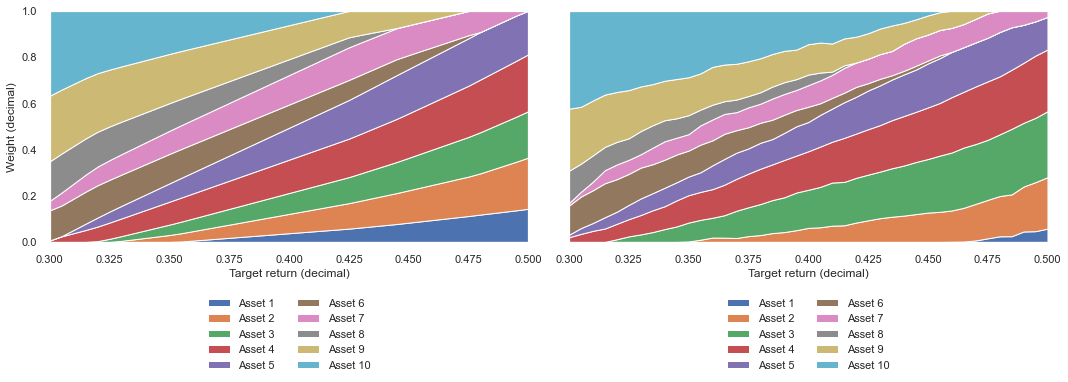

In [475]:
labels = list()

for i in range(1, 11):
    labels.append("Asset {}".format(i))

fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)

ax[0].stackplot(targets, np.array(opt_weight_std_five_years).T, labels = labels)
ax[0].set_xlim([targets.min(), targets.max()])
ax[0].set_ylim(0, 1)
ax[0].set_xlabel("Target return (decimal)")
ax[0].set_ylabel("Weight (decimal)")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

ax[1].stackplot(targets, np.array(opt_weight_CVaR_five_years).T, labels = labels)
ax[1].set_xlim([targets.min(), targets.max()])
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Target return (decimal)")

ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=2);

fig.tight_layout()
plt.show()